In [5]:
%matplotlib tk

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import levy
from scipy.stats import levy_stable

from matplotlib.animation import FFMpegWriter
from matplotlib.animation import FuncAnimation 

In [3]:
# Set critical areas where the motion will become a uniform random walk
# represents areas where prey are in the context of foraging so motion will cluster there
def set_area(A, halfX, halfY, maxX, maxY):
    center_r_x = np.random.random()
    center_r_y = np.random.random()
    quadrant_r = np.random.random()
    x_offset = 0
    y_offset = 0
    if quadrant_r < 0.25:
        x_offset = 0
        y_offset = 0
    elif quadrant_r < 0.5:
        x_offset = halfX
        y_offset = 0
    elif quadrant_r < 0.75:
        x_offset = 0
        y_offset = halfY
    else:
        x_offset = halfX
        y_offset = halfY
    area_x = round(center_r_x * (maxX // 2))
    area_y = round(center_r_y * (maxY // 2))
    cluster_row_start = max(0, area_x - area_size + x_offset)
    cluster_row_end = min(maxX, area_x + area_size + x_offset)
    cluster_col_start = max(0, area_y - area_size + y_offset)
    cluster_col_end = min(maxY, area_y + area_size + y_offset)
    for cluster_row in range(cluster_row_start, cluster_row_end):
        for cluster_col in range(cluster_col_start, cluster_col_end):
            A[cluster_row, cluster_col] = 1

### Grid with sparse critical areas

In [4]:
maxX = 200
maxY = 200
halfX = maxX // 2
halfY = maxY // 2
area_size = 10
A = np.zeros((maxX, maxY))

In [5]:
num_areas = 10
for i in range(num_areas):
    set_area(A, halfX, halfY, maxX, maxY)

In [43]:
num_steps = 2000
curr_row = halfX
curr_col = halfY
random_walk_step = 1


row_pos = []
col_pos = []

metadata = dict(title='Levy flight')
writer = FFMpegWriter(fps=15, metadata=metadata)
fig = plt.figure()
plt.rcParams['figure.figsize'] = [10, 10]
plt.imshow(A, cmap = "binary")

with writer.saving(fig, "levy_flight_1.mp4", dpi=200):
    for it in range(num_steps):
        if A[curr_row, curr_col] == 1:
            direction_rand = np.random.random()
            if direction_rand < 0.25:
                curr_row += random_walk_step
                curr_col += random_walk_step
            elif direction_rand < 0.5:
                curr_row -= random_walk_step
                curr_col += random_walk_step
            elif direction_rand < 0.75:
                curr_row += random_walk_step
                curr_col -= random_walk_step
            else:
                curr_row -= random_walk_step
                curr_col -= random_walk_step
        else:
            angle_rand = np.random.random() * 2 * np.pi
            levy_step = levy_stable.rvs(size=1, alpha = 1, beta = 1)[0]
            curr_row += int(round(np.sin(angle_rand) * levy_step))
            curr_col += int(round(np.cos(angle_rand) * levy_step))
        if curr_row >= maxY:
            curr_row = maxY - 1
        if curr_row < 0:
            curr_row = 0
        if curr_col >= maxX:
            curr_col = maxX - 1
        if curr_col < 0:
            curr_col = 0
        row_pos.append(curr_row)
        col_pos.append(curr_col)
        if it % 10 == 0:
            plt.clf()
            plt.imshow(A, cmap = "binary")
            plt.plot(col_pos, row_pos)
            plt.show()
            plt.draw()
            plt.pause(0.05)
            writer.grab_frame()
            print(str(it) + '..',end='')

0..10..20..30..40..50..60..70..80..90..100..110..120..130..140..150..160..170..180..190..200..210..220..230..240..250..260..270..280..290..300..310..320..330..340..350..360..370..380..390..400..410..420..430..440..450..460..470..480..490..500..510..520..530..540..550..560..570..580..590..600..610..620..630..640..650..660..670..680..690..700..710..720..730..740..750..760..770..780..790..800..810..820..830..840..850..860..870..880..890..900..910..920..930..940..950..960..970..980..990..1000..1010..1020..1030..1040..1050..1060..1070..1080..1090..1100..1110..1120..1130..1140..1150..1160..1170..1180..1190..1200..1210..1220..1230..1240..1250..1260..1270..1280..1290..1300..1310..1320..1330..1340..1350..1360..1370..1380..1390..1400..1410..1420..1430..1440..1450..1460..1470..1480..1490..1500..1510..1520..1530..1540..1550..1560..1570..1580..1590..1600..1610..1620..1630..1640..1650..1660..1670..1680..1690..1700..1710..1720..1730..1740..1750..1760..1770..1780..1790..1800..1810..1820..1830..1840..1

### Grid with many critical areas

In [37]:
maxX = 200
maxY = 200
halfX = maxX // 2
halfY = maxY // 2
area_size = 10
A = np.zeros((maxX, maxY))

In [38]:
num_areas = 50
for i in range(num_areas):
    set_area(A, halfX, halfY, maxX, maxY)

In [39]:
plt.imshow(A, cmap = "binary")

In [40]:
num_steps = 2000
curr_row = halfX
curr_col = halfY
random_walk_step = 1


row_pos = []
col_pos = []

metadata = dict(title='Levy flight with many critical areas')
writer = FFMpegWriter(fps=15, metadata=metadata)
fig = plt.figure()
plt.rcParams['figure.figsize'] = [10, 10]
plt.imshow(A, cmap = "binary")

with writer.saving(fig, "levy_flight_2.mp4", dpi=200):
    for it in range(num_steps):
        if A[curr_row, curr_col] == 1:
            direction_rand = np.random.random()
            if direction_rand < 0.25:
                curr_row += random_walk_step
                curr_col += random_walk_step
            elif direction_rand < 0.5:
                curr_row -= random_walk_step
                curr_col += random_walk_step
            elif direction_rand < 0.75:
                curr_row += random_walk_step
                curr_col -= random_walk_step
            else:
                curr_row -= random_walk_step
                curr_col -= random_walk_step
        else:
            angle_rand = np.random.random() * 2 * np.pi
            levy_step = levy_stable.rvs(size=1, alpha = 1, beta = 1)[0]
            curr_row += int(round(np.sin(angle_rand) * levy_step))
            curr_col += int(round(np.cos(angle_rand) * levy_step))
        if curr_row >= maxY:
            curr_row = maxY - 1
        if curr_row < 0:
            curr_row = 0
        if curr_col >= maxX:
            curr_col = maxX - 1
        if curr_col < 0:
            curr_col = 0
        row_pos.append(curr_row)
        col_pos.append(curr_col)
        if it % 10 == 0:
            plt.clf()
            plt.imshow(A, cmap = "binary")
            plt.plot(col_pos, row_pos)
            plt.show()
            plt.draw()
            plt.pause(0.05)
            writer.grab_frame()
            print(str(it) + '..',end='')

0..10..20..30..40..50..60..70..80..90..100..110..120..130..140..150..160..170..180..190..200..210..220..230..240..250..260..270..280..290..300..310..320..330..340..350..360..370..380..390..400..410..420..430..440..450..460..470..480..490..500..510..520..530..540..550..560..570..580..590..600..610..620..630..640..650..660..670..680..690..700..710..720..730..740..750..760..770..780..790..800..810..820..830..840..850..860..870..880..890..900..910..920..930..940..950..960..970..980..990..1000..1010..1020..1030..1040..1050..1060..1070..1080..1090..1100..1110..1120..1130..1140..1150..1160..1170..1180..1190..1200..1210..1220..1230..1240..1250..1260..1270..1280..1290..1300..1310..1320..1330..1340..1350..1360..1370..1380..1390..1400..1410..1420..1430..1440..1450..1460..1470..1480..1490..1500..1510..1520..1530..1540..1550..1560..1570..1580..1590..1600..1610..1620..1630..1640..1650..1660..1670..1680..1690..1700..1710..1720..1730..1740..1750..1760..1770..1780..1790..1800..1810..1820..1830..1840..1

### Generate picture of multiple Levy flights

In [11]:
maxX = 200
maxY = 200
halfX = maxX // 2
halfY = maxY // 2
area_size = 10
A = np.zeros((maxX, maxY))

In [12]:
num_areas = 10
for i in range(num_areas):
    set_area(A, halfX, halfY, maxX, maxY)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
5

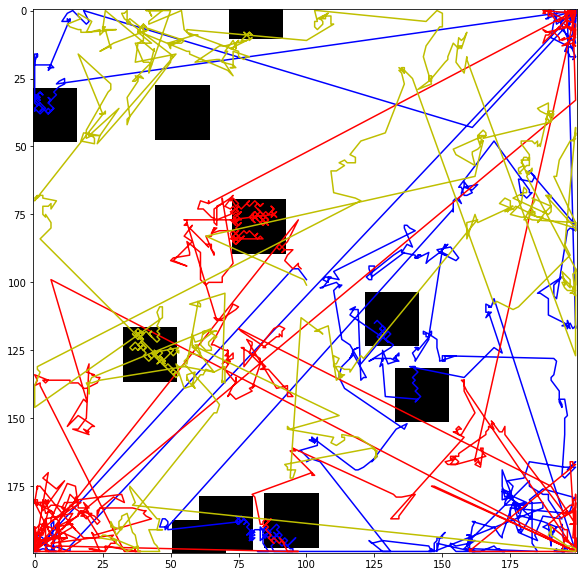

In [18]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.imshow(A, cmap = "binary")
num_flights = 3
num_steps = 1000
plot_colors = ["b-", "r-", "y-"]
random_walk_step = 1

for flight in range(num_flights):
    curr_row = halfX
    curr_col = halfY
    row_pos = []
    col_pos = []
    for it in range(num_steps):
        if A[curr_row, curr_col] == 1:
            direction_rand = np.random.random()
            if direction_rand < 0.25:
                curr_row += random_walk_step
                curr_col += random_walk_step
            elif direction_rand < 0.5:
                curr_row -= random_walk_step
                curr_col += random_walk_step
            elif direction_rand < 0.75:
                curr_row += random_walk_step
                curr_col -= random_walk_step
            else:
                curr_row -= random_walk_step
                curr_col -= random_walk_step
        else:
            angle_rand = np.random.random() * 2 * np.pi
            levy_step = levy_stable.rvs(size=1, alpha = 1, beta = 1)[0]
            curr_row += int(round(np.sin(angle_rand) * levy_step))
            curr_col += int(round(np.cos(angle_rand) * levy_step))
        if curr_row >= maxY:
            curr_row = maxY - 1
        if curr_row < 0:
            curr_row = 0
        if curr_col >= maxX:
            curr_col = maxX - 1
        if curr_col < 0:
            curr_col = 0
        row_pos.append(curr_row)
        col_pos.append(curr_col)
        if it % 10 == 0:
            print(it)
    plt.plot(col_pos, row_pos, plot_colors[flight])

plt.savefig('levy_flight_multiple.png', dpi = 100) 